# Doing some quick EDA for this dataset: https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

In [1]:
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

In [2]:
df = pd.read_csv("Womens_Clothing_E-Commerce_Reviews.csv")
df.drop(columns="Unnamed: 0", inplace=True)
print(df.shape)
df.head()

(23486, 10)


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [3]:
# For the sake of playing around with transformers i'm gonna drop everything except Title, Review Text, Rating, and Recommended IND
# (but if i was really trying to make a good classifier the other columns could be useful!)
keep_cols = ["Title", "Review Text", "Rating", "Recommended IND"]
df = df[keep_cols]

In [4]:
# Check out nulls
df.isna().sum()

Title              3810
Review Text         845
Rating                0
Recommended IND       0
dtype: int64

In [5]:
# Any rows where Title and Review Text are null we should get rid of
null = df["Title"].isna() & df["Review Text"].isna()
print(f"Rows where 'Title' and 'Review Text' are both empty: {null.sum()}")
df = df[~null]
print(df.shape)

Rows where 'Title' and 'Review Text' are both empty: 844
(22642, 4)


In [6]:
# Combine title and review text into a single column
df["Title"] = df["Title"].fillna("")
df["Review Text"] = df["Review Text"].fillna("")
df["review"] = df["Title"] + " " + df["Review Text"]
df["review"] = df["review"].str.strip()
df.drop(columns=["Title", "Review Text"], inplace=True)
df.head()

,Rating,Recommended IND,review
0,4,1,Absolutely wonderful - silky and sexy and comfortable
1,5,1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite."
2,3,0,"Some major design flaws I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c"
3,5,1,"My favorite buy! I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
4,5,1,Flattering shirt This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!


<Axes: xlabel='Rating', ylabel='count'>

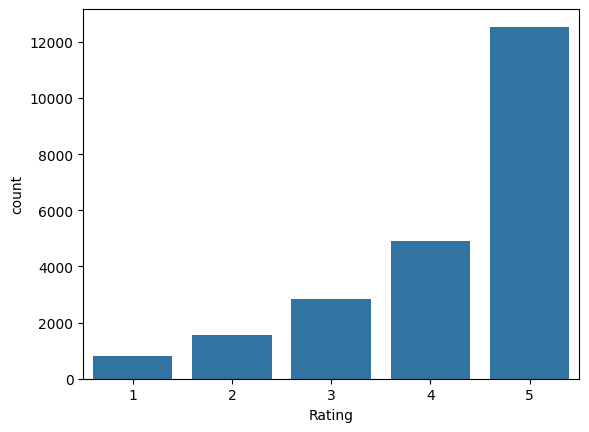

In [7]:
import seaborn as sns

# Check out distribution of ratings
sns.barplot(df["Rating"].value_counts())

<Axes: xlabel='Recommended IND', ylabel='count'>

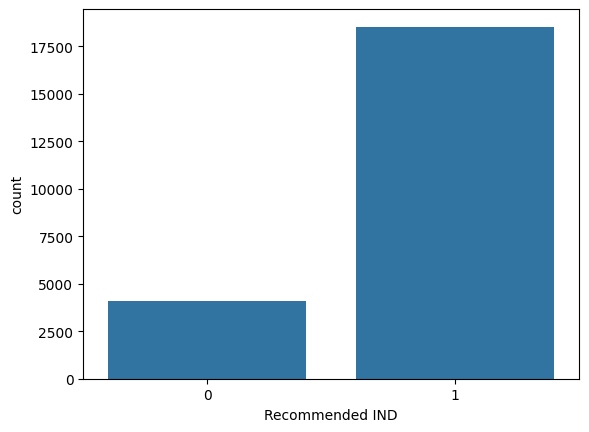

In [8]:
sns.barplot(df["Recommended IND"].value_counts())

<Axes: xlabel='char_count', ylabel='Count'>

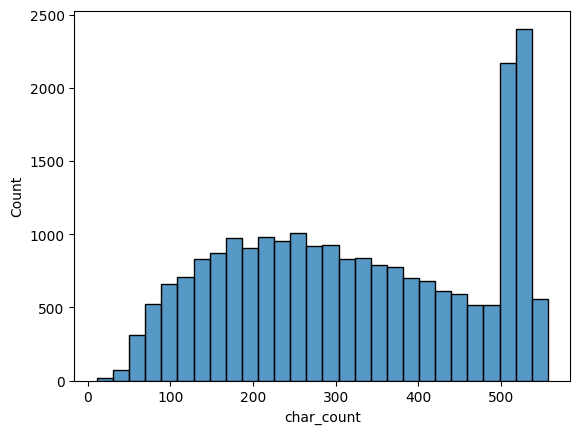

In [9]:
# Get a feel for how long each review is
df["char_count"] = df["review"].apply(lambda x: len(x))
sns.histplot(df["char_count"])

<Axes: xlabel='word_count', ylabel='Count'>

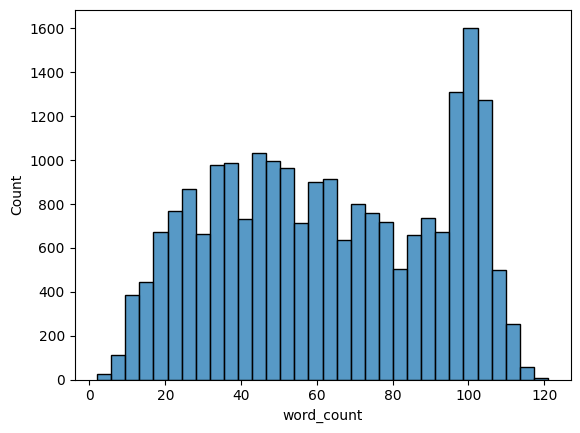

In [10]:
df["word_count"] = df["review"].apply(lambda x: len(x.split()))
sns.histplot(df["word_count"])

In [11]:
# Take a look at some short reviews
df[df["word_count"] < 10][["word_count", "review"]].sort_values(by="word_count")

,word_count,review
7236,2,Comfy cozy!
2978,2,Love embroidery!
859,2,Great style!
9121,3,"Very pretty, romantic"
5925,3,Beautiful and delicate!!
...,...,...
20055,9,Fabulous cords These tight cords are perfect for fall.
6447,9,Poor quality. i expected much more from the material.
6078,9,I absolutely love this sweater....it is perfect for fall
13436,9,"The design of the pant hangs nicely and fit,well,"


In [12]:
# Try to figure out roughly how many tokens each input wil be (so we can decide what to use for
# the context length of our transformer)
from transformers import AutoTokenizer

# Using byte-pair encoding for tokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")
df["token_count"] = df["review"].apply(lambda x: len(tokenizer(x).input_ids))

C:\Users\culve\miniconda3\envs\pytorch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Axes: xlabel='token_count', ylabel='Count'>

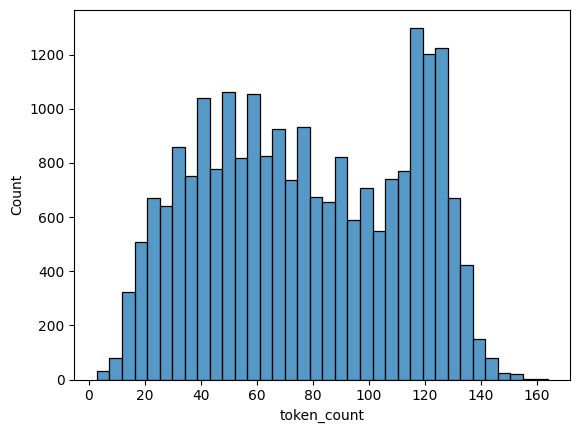

In [13]:
sns.histplot(df["token_count"])

In [14]:
# Choosing a context length
max_len = df["token_count"].max()
max_len
for power in range(1, 10):
    context = min(max_len, 2**power)
    print(f"Percent of data thats less than {context} tokens: {(df['token_count'] <= context).mean():.4f}")
    if context == max_len:
        break

Percent of data thats less than 2 tokens: 0.0000
Percent of data thats less than 4 tokens: 0.0003
Percent of data thats less than 8 tokens: 0.0019
Percent of data thats less than 16 tokens: 0.0192
Percent of data thats less than 32 tokens: 0.1219
Percent of data thats less than 64 tokens: 0.4079
Percent of data thats less than 128 tokens: 0.9395
Percent of data thats less than 164 tokens: 1.0000


In [15]:
# Saving cleaned data
df[["review", "Rating", "Recommended IND"]].to_csv("Womens_Clothing_E-Commerce_Reviews_CLEANED.csv", index=False)